In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Change to RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # For regression tasks, you might want to use a different metric

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

por_PCR = pd.read_csv("student-por-PCA.csv")

X = por_PCR.drop('G3', axis=1)
y = por_PCR['G3']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

y_train_pred = rf_regressor.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Training): {mse_train}")

# Calculate the mean squared error (or other appropriate metric) for regression
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error (Training): 0.4053537210782734
Mean Squared Error: 0.8113354855435673
R-squared: 0.20750897977500615


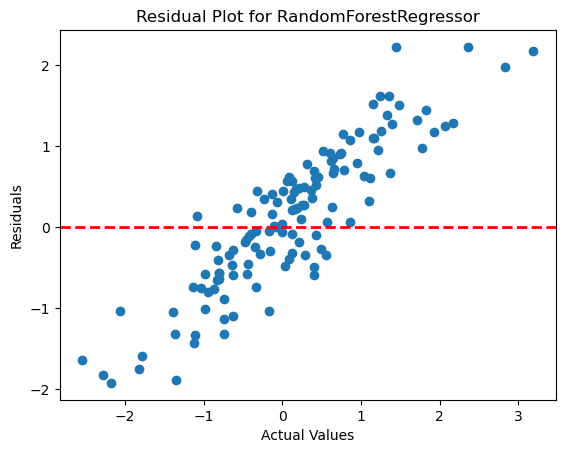

In [2]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for RandomForestRegressor")
plt.show()


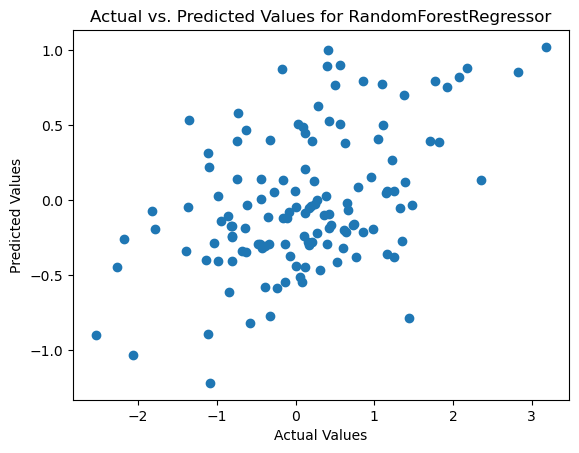

Mean Squared Error (Training): 0.4053537210782734
Mean Squared Error: 0.8113354855435673
R-squared: 0.20750897977500615


In [3]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for RandomForestRegressor")
plt.show()
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Training): {mse_train}")

# Calculate the mean squared error (or other appropriate metric) for regression
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

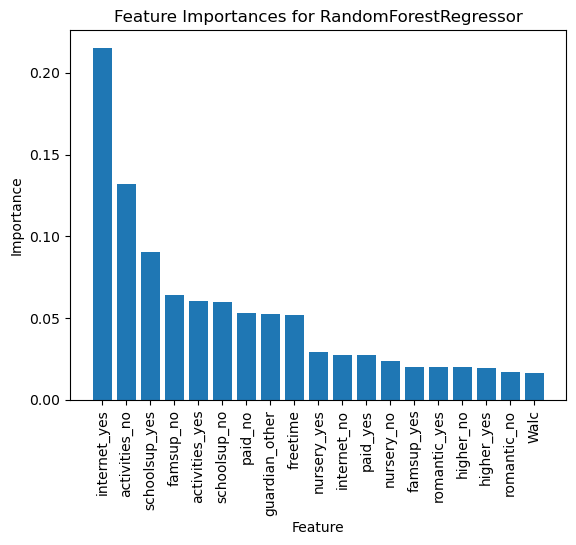

In [4]:
import matplotlib.pyplot as plt
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances for RandomForestRegressor")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Best Model): {mse}")
print(f"R-squared (Best Model): {r2}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (Best Model): 0.783886946662278
R-squared (Best Model): 0.2343199857883137
